<a href="https://colab.research.google.com/github/jonhyuk0922/ML-study/blob/main/%5Bcodeit%5D_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#선형 회귀(Linear Regression)
## 경사하강법 구현 및 시각화 

In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def prediction(theta_0, theta_1,x):
  return theta_0 + theta_1*x

In [25]:
def prediction_difference(theta_0,theta_1,x,y):
  return prediction(theta_0,theta_1,x) - y

In [59]:
def gradient_descent(theta_0,theta_1,x,y,num_iterations, alpha):
  m = len(x)
  cost_list = []

  for i in range(num_iterations):
    error = prediction_difference(theta_0,theta_1,x,y)
    cost = (error @ error) / (2*m)
    cost_list.append(cost)
    if i % 10 == 0:
      plt.scatter(house_size,house_prize)
      plt.plot(house_size,prediction(theta_0,theta_1,x),color='red')
      plt.show()
    theta_0 = theta_0 - alpha * error.mean()
    theta_1 = theta_1 - alpha * (error*x).mean()

  return theta_0, theta_1,cost_list

In [60]:
house_size = np.array([0.9, 1.4, 2, 2.1, 2.6, 3.3, 3.35, 3.9 , 4.4, 4.7, 5.2, 5.75, 6.7, 6.9])
house_prize = np.array([0.3,0.75, 0.45,1.1,1.45,0.9, 1.8, 0.9, 1.5,2.2,1.75,2.3,2.49,2.6])

#theta 초기값 설정
th_0 = 2.5
th_1 = 0

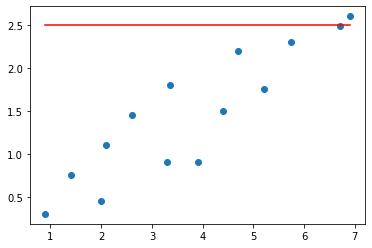

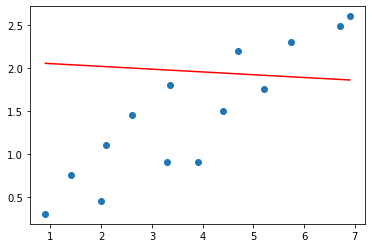

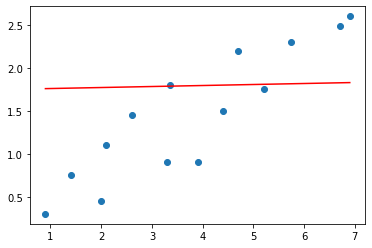

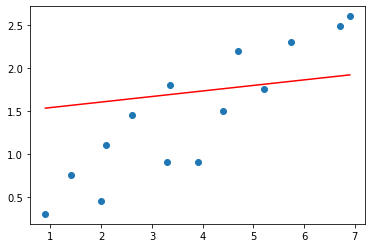

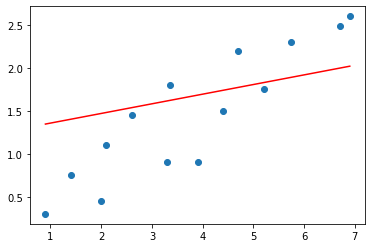

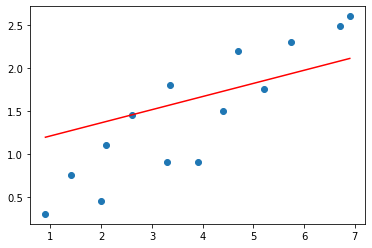

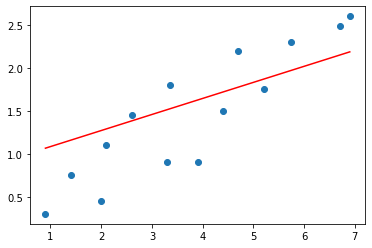

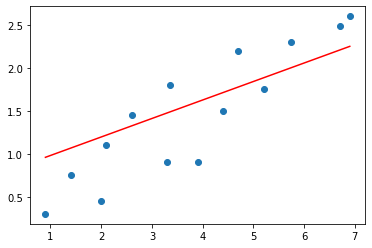

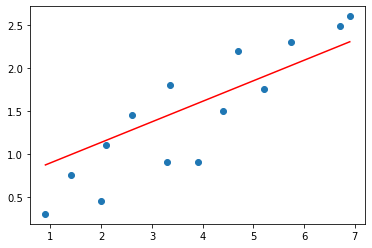

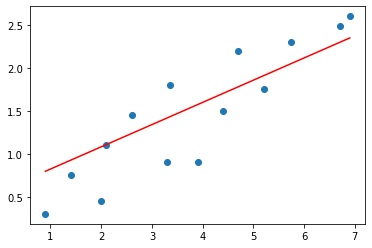

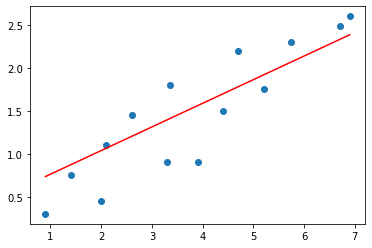

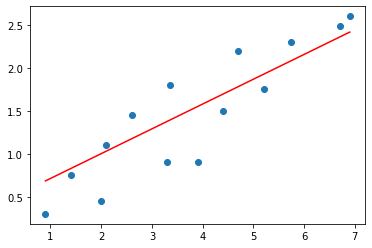

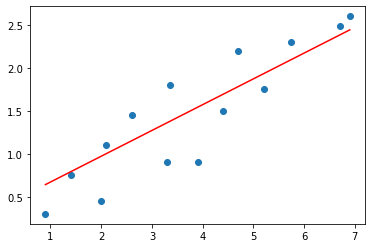

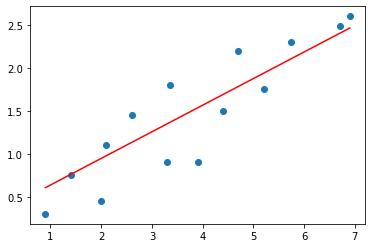

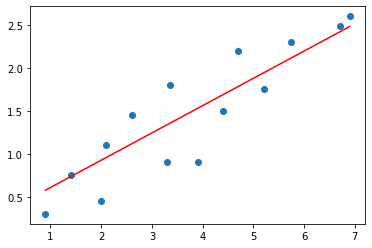

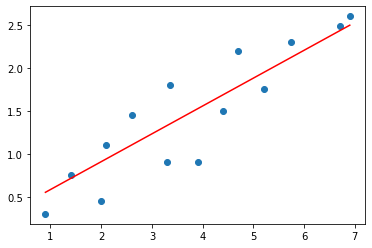

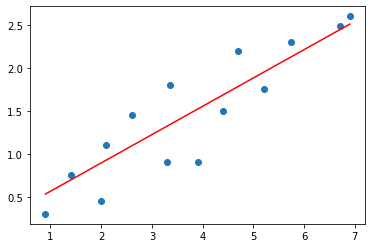

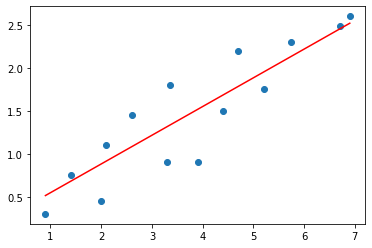

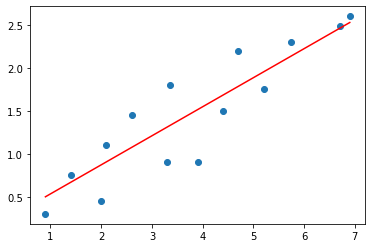

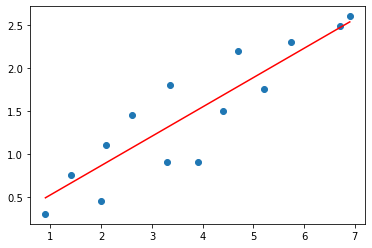

In [61]:
th_0,th_1,cost_list = gradient_descent(th_0,th_1,house_size,house_prize, 200, 0.1)

In [40]:
print(th_0,th_1)

2.396357142857143 -0.27358571428571427


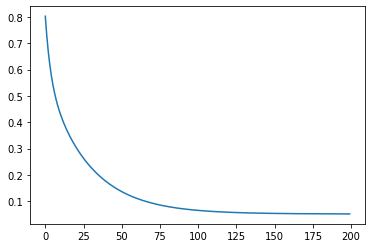

In [53]:
plt.plot(cost_list)

##보스턴 집값 데이터 불러오기 (sklearn)

In [63]:
from sklearn.datasets import load_boston

In [65]:
boston_dataset = load_boston()

In [71]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [72]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [73]:
boston_dataset.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [80]:
boston_dataset.data.shape

(506, 13)

In [82]:
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [81]:
boston_dataset.target.shape

(506,)

## np array를 dataframe으로 바꿔주기

In [83]:
import pandas as pd

In [85]:
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [113]:
df1 = df[['AGE']]
df1

,AGE
0,65.2
1,78.9
2,61.1
3,45.8
4,54.2
...,...
501,69.1
502,76.7
503,91.0
504,89.3


In [97]:
df_target = pd.DataFrame(boston_dataset.target,columns=['MEDV'])

In [98]:
df_target

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


## data validation

In [114]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df1,df_target, test_size=0.2, random_state=42)

In [115]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [116]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [117]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [119]:
model.coef_

array([[-0.11341158]])

In [120]:
model.intercept_

array([30.57162854])

In [122]:
y_test_prediction = model.predict(x_test)
y_test_prediction

array([[21.03371442],
       [26.84038746],
       [19.36656415],
       [29.68701819],
       [20.16044523],
       [22.12246561],
       [21.13578484],
       [19.95630438],
       [20.28519797],
       [21.53272538],
       [19.93362206],
       [20.82957357],
       [19.23047025],
       [24.48142654],
       [22.14514793],
       [22.90500553],
       [19.70679889],
       [19.23047025],
       [26.94245789],
       [19.3779053 ],
       [28.72301974],
       [26.93111673],
       [19.89959859],
       [22.73488816],
       [19.76350469],
       [19.75216353],
       [26.4207646 ],
       [19.89959859],
       [20.12642175],
       [22.56477078],
       [20.53470345],
       [24.64020275],
       [19.46863457],
       [19.66143426],
       [19.85423395],
       [19.40058762],
       [23.64218082],
       [25.32067225],
       [23.86900399],
       [29.86847673],
       [22.30392414],
       [22.59879426],
       [26.95379904],
       [26.39808229],
       [23.07512291],
       [19

In [124]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_test_prediction) ** 0.5

7.465425749458366